# AC 209a: Predicting the 2020 Election
#### Blake Bullwinkel, Teresa Datta, Victor Avram, Kristen Grabarz

This notebook contains our analysis of unemployment data, which we used as a proxy for COVID-19 effects, and includes a number of
helpful visualizations included in our report. Please see the other notebook included in this submission to find the majority of our
analysis, including data processing, EDA, modeling, and forecasting.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
unem = pd.read_csv('unemployment_data.csv')
unem.describe()
outcome_data = pd.read_csv("potus_results_76_16.csv")
outcome_data['FC'] = outcome_data['dem']/outcome_data['rep']

### Remove DC so that the other states can be easily visualized ###
outcome_data = outcome_data[outcome_data['state'] != 'DC']

In [59]:
# Merge with unemployment
merged_unem = outcome_data.merge(unem, how = 'inner', left_on=['state'], right_on = ['State'])
merged_unem.head()

,year,state,total_votes,dem,rep,other,FC,Unnamed: 0,State,Oct-10,...,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,delta_2020,delta_2016,delta_2012
0,1976,AK,123574,0.356531,0.579046,0.054906,0.615722,1,AK,10.1,...,13.8,9.6,7.6,7.9,5.6,6.7,5.8,3.1,-0.1,-0.3
1,1980,AK,158445,0.264079,0.543482,0.187030,0.485902,1,AK,10.1,...,13.8,9.6,7.6,7.9,5.6,6.7,5.8,3.1,-0.1,-0.3
2,1984,AK,207605,0.298678,0.666540,0.034782,0.448102,1,AK,10.1,...,13.8,9.6,7.6,7.9,5.6,6.7,5.8,3.1,-0.1,-0.3
3,1988,AK,200116,0.362710,0.595909,0.036599,0.608666,1,AK,10.1,...,13.8,9.6,7.6,7.9,5.6,6.7,5.8,3.1,-0.1,-0.3
4,1992,AK,258506,0.302871,0.394575,0.301142,0.767588,1,AK,10.1,...,13.8,9.6,7.6,7.9,5.6,6.7,5.8,3.1,-0.1,-0.3


In [60]:
merged_unem = merged_unem.copy()
merged_unem['outcome'] = 'Democrat'
merged_unem['outcome'][merged_unem['dem']<0.5] = 'Republican'

# 2012
data_2012 = merged_unem[merged_unem['year']==2012]
# 2016
data_2016 = merged_unem[merged_unem['year']==2016]
# 2020
data_2020 = merged_unem[merged_unem['year']==2020]

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
data_2012.head()

,year,state,total_votes,dem,rep,other,FC,Unnamed: 0,State,Oct-10,...,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,delta_2020,delta_2016,delta_2012,outcome
9,2012,AK,300495,0.408127,0.548016,0.034307,0.744735,1,AK,10.1,...,9.6,7.6,7.9,5.6,6.7,5.8,3.1,-0.1,-0.3,Republican
20,2012,AL,2074338,0.383590,0.605458,0.009018,0.633554,2,AL,7.8,...,12.7,12.4,11.6,7.4,7.2,5.9,-0.1,0.2,-0.4,Republican
31,2012,AR,1069468,0.368790,0.605669,0.025541,0.608896,3,AR,10.1,...,9.0,10.0,10.7,5.9,6.5,8.0,3.5,-0.4,-0.7,Republican
42,2012,AZ,2299254,0.445898,0.536545,0.017360,0.831053,4,AZ,8.3,...,9.6,8.1,7.1,7.4,7.2,6.2,2.7,-0.4,-0.2,Republican
53,2012,CA,13038547,0.602390,0.371204,0.024624,1.622800,5,CA,12.3,...,16.4,14.9,13.5,11.2,11.1,9.3,5.4,-0.3,-1.1,Democrat


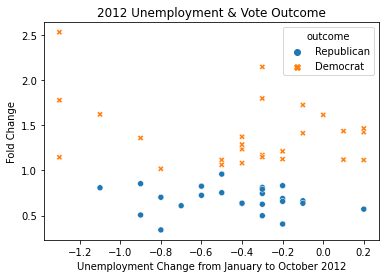

In [62]:
# Plot
sns.scatterplot(x="delta_2012", y="FC", data=data_2012, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('2012 Unemployment & Vote Outcome')
# Set x-axis label
plt.xlabel('Unemployment Change from January to October 2012')
# Set y-axis label
plt.ylabel('Fold Change')
plt.show()

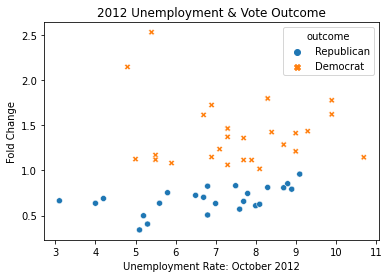

In [139]:
# Plot
sns.scatterplot(x="Oct-12", y="FC", data=data_2012, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('2012 Unemployment & Vote Outcome')
# Set x-axis label
plt.xlabel('Unemployment Rate: October 2012')
# Set y-axis label
plt.ylabel('Fold Change')
plt.show()

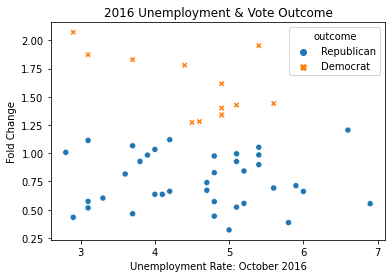

In [65]:
# Plot
sns.scatterplot(x="Oct-16", y="FC", data=data_2016, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('2016 Unemployment & Vote Outcome')
# Set x-axis label
plt.xlabel('Unemployment Rate: October 2016')
# Set y-axis label
plt.ylabel('Fold Change')
plt.show()

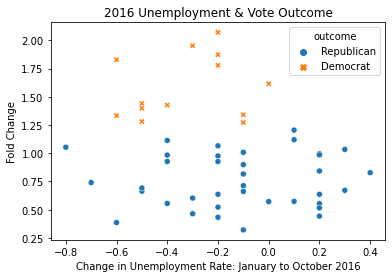

In [66]:
# Plot
sns.scatterplot(x="delta_2016", y="FC", data=data_2016, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('2016 Unemployment & Vote Outcome')
# Set x-axis label
plt.xlabel('Change in Unemployment Rate: January to October 2016')
# Set y-axis label
plt.ylabel('Fold Change')
plt.show()

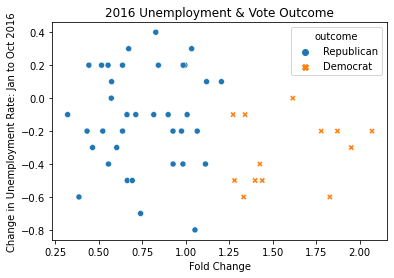

In [67]:
# Switch axes to match NYT?
sns.scatterplot(x="FC", y="delta_2016", data=data_2016, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('2016 Unemployment & Vote Outcome')
# Set x-axis label
plt.xlabel('Fold Change')
# Set y-axis label
plt.ylabel('Change in Unemployment Rate: Jan to Oct 2016')
plt.show()

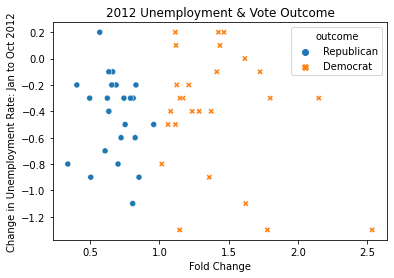

In [68]:
# Switch axes to match NYT?
sns.scatterplot(x="FC", y="delta_2012", data=data_2012, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('2012 Unemployment & Vote Outcome')
# Set x-axis label
plt.xlabel('Fold Change')
# Set y-axis label
plt.ylabel('Change in Unemployment Rate: Jan to Oct 2012')
plt.show()

In [82]:
# Line chart of unemployment rate month over month?
test = unem[['State', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20']]
filter_list = ['CA', 'NY', 'WI', 'FL']
state_for_plotting = test[test.State.isin(filter_list)]


In [93]:
# CA
ca = state_for_plotting[state_for_plotting['State']=='CA'].drop(['State'], axis=1).T
ny = state_for_plotting[state_for_plotting['State']=='NY'].T
wi = state_for_plotting[state_for_plotting['State']=='WI'].T
fl = state_for_plotting[state_for_plotting['State']=='FL'].T

In [126]:
ca['state'] = 'CA'
ny['state'] = 'NY'
wi['state'] = 'WI'
fl['state'] = 'FL'
all_dfs = [ca, ny, wi, fl]
for df in all_dfs:
    df.columns = ['Unemployment Rate', 'state']

plot_data = pd.concat(all_dfs)
plot_data['month_year'] = plot_data.index
#dt.strftime("%d-%m-%Y")
plot_data = plot_data[plot_data['month_year']!='State']
plot_data['month_year'] = pd.to_datetime(plot_data['month_year'].astype(str), format="%b-%y")


In [131]:
plot_data["Unemployment Rate"] = plot_data["Unemployment Rate"].astype(float)

In [132]:
plot_data

,Unemployment Rate,state,month_year
Nov-18,4.2,CA,2018-11-01
Dec-18,4.3,CA,2018-12-01
Jan-19,4.3,CA,2019-01-01
Feb-19,4.3,CA,2019-02-01
Mar-19,4.2,CA,2019-03-01
...,...,...,...
Jun-20,10.3,FL,2020-06-01
Jul-20,11.4,FL,2020-07-01
Aug-20,7.3,FL,2020-08-01
Sep-20,7.2,FL,2020-09-01


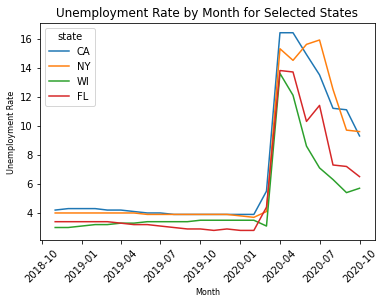

In [137]:
plot_data.shape
sns.lineplot(x = "month_year", y = "Unemployment Rate", hue="state", data=plot_data)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Unemployment Rate by Month for Selected States')
# Set x-axis label
plt.xlabel('Month', fontsize=8)
# Set y-axis label
plt.ylabel('Unemployment Rate', fontsize=8)
plt.xticks(rotation=45)
plt.show()

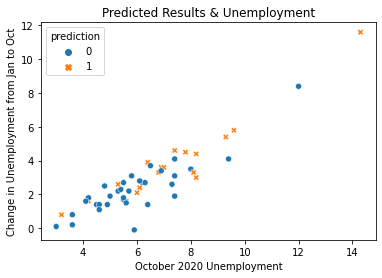

In [151]:
pres_predictions = pd.read_csv('Presidential_Predictions.csv')
pres_predictions

pred_with_unemployment = pres_predictions.merge(unem, how = 'inner', left_on=['state'], right_on = ['State'])
pred_with_unemployment[['state', 'prediction', 'delta_2020', 'Oct-20']]
# Plot
# Switch axes to match NYT?
sns.scatterplot(x="Oct-20", y="delta_2020", data=pred_with_unemployment, hue='prediction', legend=True, style = 'prediction')
 
# Move the legend to an empty part of the plot
plt.title('Predicted Results & Unemployment')
# Set x-axis label
plt.xlabel('October 2020 Unemployment')
# Set y-axis label
plt.ylabel('Change in Unemployment from Jan to Oct')
plt.show()


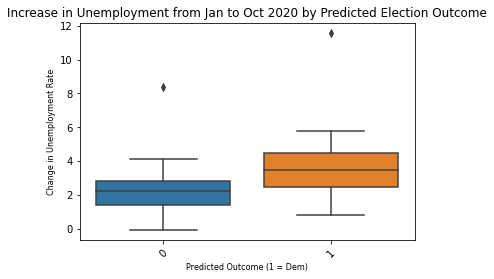

In [153]:
# What about a histogram of change in unemployment based on predicted outcome
ax = sns.boxplot(x="prediction", y="delta_2020", data=pred_with_unemployment)
plt.title('Increase in Unemployment from Jan to Oct 2020 by Predicted Election Outcome')
# Set x-axis label
plt.xlabel('Predicted Outcome (1 = Dem)', fontsize=8)
# Set y-axis label
plt.ylabel('Change in Unemployment Rate', fontsize=8)
plt.xticks(rotation=45)
plt.show()

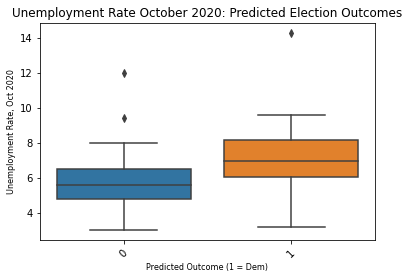

In [201]:
# What about a histogram of change in unemployment based on predicted outcome
ax = sns.boxplot(x="prediction", y="Oct-20", data=pred_with_unemployment)
plt.title('Unemployment Rate October 2020: Predicted Election Outcomes')
# Set x-axis label
plt.xlabel('Predicted Outcome (1 = Dem)', fontsize=8)
# Set y-axis label
plt.ylabel('Unemployment Rate, Oct 2020', fontsize=8)
plt.xticks(rotation=45)
plt.show()

In [171]:
# get 2020 pres results

actual_20_pres = pd.read_csv("/home/jovyan/work/2020_pres_results-cook_political.csv")
state_name_crosswalk = pd.read_csv("state_name_crosswalk.csv")
actual_20_pres['rep_votes'] = actual_20_pres['rep_votes'].str.replace(',', '').astype(float)
actual_20_pres['dem_votes'] = actual_20_pres['dem_votes'].str.replace(',', '').astype(float)
actual_20_pres['result'] = np.where(actual_20_pres.rep_votes>actual_20_pres.dem_votes, 0, 1)
actual_20_merge = actual_20_pres[['state','result']]
actual_20_merge
state_name_crosswalk
unem
temp1 = unem.merge(state_name_crosswalk, how = 'inner', left_on=['State'], right_on = ['Code'])
#temp1
#actual_20_merge
state_unemployment = temp1.merge(actual_20_merge, how = 'inner', left_on=['State_y'], right_on = ['state'])
state_unemployment

#us_shape_pres20 = pd.merge(us_shape_pres20, actual_20_merge, how = 'left', left_on = ['STATE_NAME'], right_on = ['state'])

,Unnamed: 0,State_x,Oct-10,Nov-10,Dec-10,Jan-11,Feb-11,Mar-11,Apr-11,May-11,...,Sep-20,Oct-20,delta_2020,delta_2016,delta_2012,State_y,Abbrev,Code,state,result
0,1,AK,10.1,10.2,10.3,10.2,10.2,10.1,10.0,10.0,...,6.7,5.8,3.1,-0.1,-0.3,Alaska,Alaska,AK,Alaska,0
1,2,AL,7.8,7.8,7.8,7.8,7.7,7.7,7.6,7.6,...,7.2,5.9,-0.1,0.2,-0.4,Alabama,Ala.,AL,Alabama,0
2,3,AR,10.1,10.0,9.9,9.8,9.7,9.7,9.7,9.7,...,6.5,8.0,3.5,-0.4,-0.7,Arkansas,Ark.,AR,Arkansas,0
3,4,AZ,8.3,8.3,8.4,8.5,8.5,8.5,8.5,8.5,...,7.2,6.2,2.7,-0.4,-0.2,Arizona,Ariz.,AZ,Arizona,1
4,5,CA,12.3,12.3,12.2,12.1,12.0,11.9,11.8,11.8,...,11.1,9.3,5.4,-0.3,-1.1,California,Calif.,CA,California,1
5,6,CO,8.9,8.9,8.9,8.8,8.7,8.5,8.4,8.3,...,6.4,6.4,3.9,-0.4,-0.5,Colorado,Colo.,CO,Colorado,1
6,7,CT,9.2,9.3,9.3,9.2,9.2,9.2,9.1,9.0,...,7.7,6.1,2.4,-0.6,0.2,Connecticut,Conn.,CT,Connecticut,1
7,8,DE,8.2,8.1,8.0,7.9,7.8,7.7,7.6,7.5,...,8.3,5.6,1.6,-0.1,0.2,Delaware,Del.,DE,Delaware,1
8,9,DC,9.3,9.4,9.5,9.6,9.8,10.1,10.3,10.4,...,9.0,8.2,3.0,-0.4,-1.1,District of Columbia,D.C.,DC,District of Columbia,1
9,10,FL,11.0,11.0,10.8,10.7,10.5,10.4,10.3,10.2,...,7.2,6.5,3.7,-0.2,-0.8,Florida,Fla.,FL,Florida,0


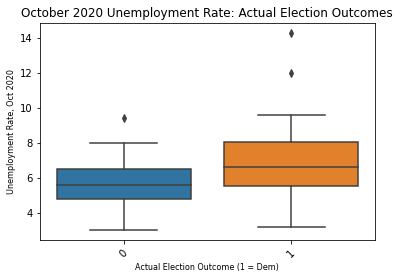

In [173]:
# What about a histogram of change in unemployment based on predicted outcome
ax = sns.boxplot(x="result", y="Oct-20", data=state_unemployment)
plt.title('October 2020 Unemployment Rate: Actual Election Outcomes')
# Set x-axis label
plt.xlabel('Actual Election Outcome (1 = Dem)', fontsize=8)
# Set y-axis label
plt.ylabel('Unemployment Rate, Oct 2020', fontsize=8)
plt.xticks(rotation=45)
plt.show()

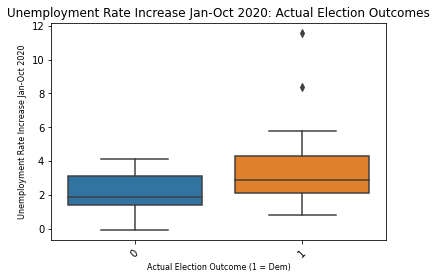

In [175]:
# What about a histogram of change in unemployment based on predicted outcome
ax = sns.boxplot(x="result", y="delta_2020", data=state_unemployment)
plt.title('Unemployment Rate Increase Jan-Oct 2020: Actual Election Outcomes')
# Set x-axis label
plt.xlabel('Actual Election Outcome (1 = Dem)', fontsize=8)
# Set y-axis label
plt.ylabel('Unemployment Rate Increase Jan-Oct 2020', fontsize=8)
plt.xticks(rotation=45)
plt.show()

## TRY LOOKING AT COVID

In [177]:
# https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days
covid = pd.read_csv('united_states_covid19_cases_and_deaths_by_state.csv')
covid.columns
# covid['case_rate_per_100k_last_7_days']
# covid['Death Rate per 100K in Last 7 Days']

# Merge in election data for 2016 and 2020



Index(['state', 'total_cases', 'confirmed_cases', 'probable_cases',
       'cases_last_7_days', 'case_rate_per_100k', 'total_deaths',
       'confirmed_deaths', 'probable_deaths', 'Deaths in Last 7 Days',
       'Death Rate per 100000', 'case_rate_per_100k_last_7_days',
       'Death Rate per 100K in Last 7 Days'],
      dtype='object')

In [183]:
#data_2016
#covid
#state_name_crosswalk

# Merge state IDs into covid
interim_1 = covid.merge(state_name_crosswalk, how = 'inner', left_on=['state'], right_on = ['State'])
#interim_1
covid_2016_results = data_2016.merge(interim_1, how = 'inner', left_on=['state'], right_on = ['Code'])
covid_2016_results.head()

covid_2020_results = data_2016.merge(interim_1, how = 'inner', left_on=['state'], right_on = ['Code'])
covid_2016_results.head()


,year,state_x,total_votes,dem,rep,other,FC,Unnamed: 0,State_x,Oct-10,...,total_deaths,confirmed_deaths,probable_deaths,Deaths in Last 7 Days,Death Rate per 100000,case_rate_per_100k_last_7_days,Death Rate per 100K in Last 7 Days,State_y,Abbrev,Code
0,2016,AK,318608,0.365509,0.512815,0.092797,0.712749,1,AK,10.1,...,157,NaN,NaN,16,21,88.0,0.3,Alaska,Alaska,AK
1,2016,AL,2123372,0.343579,0.620831,0.025364,0.553419,2,AL,7.8,...,4086,3612.0,474.0,255,83,71.8,0.8,Alabama,Ala.,AL
2,2016,AR,1130635,0.336531,0.605741,0.057728,0.555570,3,AR,10.1,...,2875,NaN,NaN,289,95,68.7,1.4,Arkansas,Ark.,AR
3,2016,AZ,2573165,0.451260,0.486716,0.054669,0.927153,4,AZ,8.3,...,7245,6689.0,556.0,360,101,84.5,0.7,Arizona,Ariz.,AZ
4,2016,CA,14181595,0.617264,0.316171,0.058051,1.952310,5,CA,12.3,...,20622,NaN,NaN,1040,52,71.9,0.4,California,Calif.,CA


In [188]:
# 2020 - pull in predictions and actuals
pres_predictions
actual_20_merge
actual_merge = actual_20_merge.merge(state_name_crosswalk, how = 'inner', left_on=['state'], right_on = ['State'])
actual_merge = actual_merge.merge(pres_predictions, how = 'inner', left_on = ['Code'], right_on = ['state'])
actual_merge = actual_merge.merge(covid, how = 'inner', left_on = ['state_x'], right_on = ['state'])
actual_merge


,state_x,result,State,Abbrev,Code,state_y,prediction,state,total_cases,confirmed_cases,probable_cases,cases_last_7_days,case_rate_per_100k,total_deaths,confirmed_deaths,probable_deaths,Deaths in Last 7 Days,Death Rate per 100000,case_rate_per_100k_last_7_days,Death Rate per 100K in Last 7 Days
0,Arizona,1,Arizona,Ariz.,AZ,AZ,0,Arizona,394512,379951.0,14561.0,42411,5501,7245,6689.0,556.0,360,101,84.5,0.7
1,Florida,0,Florida,Fla.,FL,FL,0,Florida,1087956,NaN,NaN,65602,5108,19714,NaN,NaN,720,92,44.0,0.5
2,Georgia,1,Georgia,Ga.,GA,GA,0,Georgia,531593,466904.0,64689.0,37239,5053,10031,9175.0,856.0,306,95,50.6,0.4
3,Iowa,0,Iowa,Iowa,IA,IA,0,Iowa,253601,NaN,NaN,13280,8035,3197,NaN,NaN,592,101,60.1,2.7
4,Michigan,1,Michigan,Mich.,MI,MI,0,Michigan,460346,426294.0,34052.0,40078,4610,10965,10456.0,509.0,848,109,57.3,1.2
5,Minnesota,1,Minnesota,Minn.,MN,MN,0,Minnesota,370968,NaN,NaN,31995,6611,4351,4186.0,165.0,447,77,81.5,1.1
6,Nevada,1,Nevada,Nev.,NV,NV,0,Nevada,181310,NaN,NaN,18876,5975,2479,NaN,NaN,207,81,88.9,1.0
7,New Hampshire,1,New Hampshire,N.H.,NH,NH,1,New Hampshire,29460,NaN,NaN,5770,2172,590,NaN,NaN,38,43,60.8,0.4
8,North Carolina,0,North Carolina,N.C.,NC,NC,0,North Carolina,423623,394742.0,28881.0,41089,4080,5752,5528.0,224.0,285,55,56.5,0.4
9,Ohio,0,Ohio,Ohio,OH,OH,0,Ohio,542209,497565.0,44644.0,85246,4638,7426,6864.0,562.0,544,63,104.2,0.7


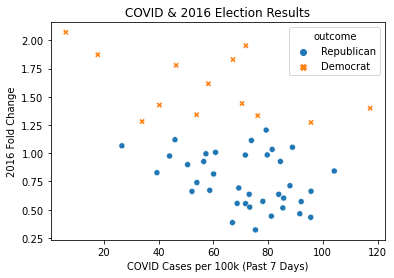

In [195]:
# 2016 FC vs. COVID?
sns.scatterplot(x="case_rate_per_100k_last_7_days", y="FC", data=covid_2016_results, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('COVID & 2016 Election Results')
# Set x-axis label
plt.xlabel('COVID Cases per 100k (Past 7 Days)')
# Set y-axis label
plt.ylabel('2016 Fold Change')
plt.show()

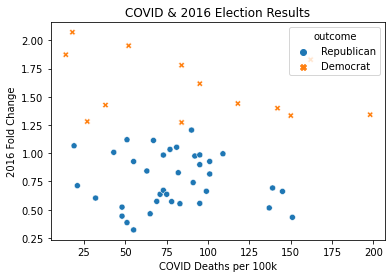

In [197]:
# 2016 FC vs. COVID?
sns.scatterplot(x="Death Rate per 100000", y="FC", data=covid_2016_results, hue='outcome', legend=True, style = 'outcome')
 
# Move the legend to an empty part of the plot
plt.title('COVID & 2016 Election Results')
# Set x-axis label
plt.xlabel('COVID Deaths per 100k')
# Set y-axis label
plt.ylabel('2016 Fold Change')
plt.show()

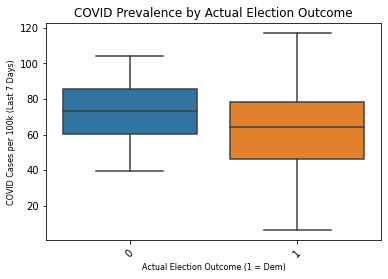

In [199]:
# What about a histogram of change in unemployment based on predicted outcome
ax = sns.boxplot(x="result", y="case_rate_per_100k_last_7_days", data=actual_merge)
plt.title('COVID Prevalence by Actual Election Outcome')
# Set x-axis label
plt.xlabel('Actual Election Outcome (1 = Dem)', fontsize=8)
# Set y-axis label
plt.ylabel('COVID Cases per 100k (Last 7 Days)', fontsize=8)
plt.xticks(rotation=45)
plt.show()

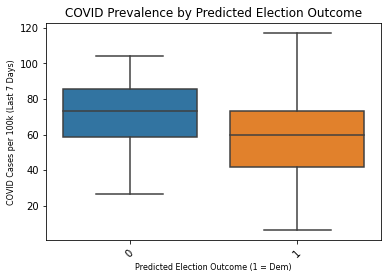

In [198]:
# What about a histogram of change in unemployment based on predicted outcome
ax = sns.boxplot(x="prediction", y="case_rate_per_100k_last_7_days", data=actual_merge)
plt.title('COVID Prevalence by Predicted Election Outcome')
# Set x-axis label
plt.xlabel('Predicted Election Outcome (1 = Dem)', fontsize=8)
# Set y-axis label
plt.ylabel('COVID Cases per 100k (Last 7 Days)', fontsize=8)
plt.xticks(rotation=45)
plt.show()